In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facebook-users-by-country-data-cleaned/data.csv


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/facebook-users-by-country-data-cleaned/data.csv")

In [3]:
df.head()

,Name,Users,Facebook_Users%,Date_of_Data,Population
0,India,416.6M,29.16%,2021-06,"1,428,627,663"
1,United States,240M,70.59%,2020-12,"339,996,563"
2,Indonesia,176.5M,63.6%,2021-06,"277,534,122"
3,Brazil,139M,64.23%,2020-12,"216,422,446"
4,Philippines,91M,77.55%,2021-06,"117,337,368"


In [4]:
df.shape

(226, 5)

In [5]:
df.isnull().sum()

Name               0
Users              0
Facebook_Users%    0
Date_of_Data       0
Population         0
dtype: int64

In [6]:
df.dtypes

Name               object
Users              object
Facebook_Users%    object
Date_of_Data       object
Population         object
dtype: object

In [7]:
# Population dtype need to be changed
df['Population'] = df['Population'].str.replace(',','')
df['Population'] = df['Population'].astype('float64')

In [8]:
# Changing Users count to numeric
def convert_to_numeric(value):
    if 'M' in value:
        N_value=value.replace("M","")
        N_value = pd.to_numeric(N_value)
        return float(N_value*1000000)
    elif 'K' in value:
        N_value=value.replace("K","")
        N_value = pd.to_numeric(N_value)
        return float(N_value*1000)
    else:
        return float(value)
    
df['Users'] = df['Users'].apply(lambda x: convert_to_numeric(x))    

In [9]:
# Changing user percentage to numeric
df['Facebook_Users%'] = df['Facebook_Users%'].str.replace('%','')
df['Facebook_Users%'] = df['Facebook_Users%'].astype('float').round(2)

In [10]:
df["Users"].head()

0    416600000.0
1    240000000.0
2    176500000.0
3    139000000.0
4     91000000.0
Name: Users, dtype: float64

In [11]:
df["Name"].nunique()

226

In [12]:
df["Name"].unique().shape

(226,)

In [13]:
# Top Country by Facebook_User%
top_users_per = df.nlargest(10,'Facebook_Users%')


In [14]:
top_users_per

,Name,Users,Facebook_Users%,Date_of_Data,Population
224,Vatican City,799.0,154.25,2020-12,518.0
44,United Arab Emirates,10300000.0,108.40,2021-03,9516871.0
96,Qatar,2900000.0,108.05,2021-03,2716391.0
146,Brunei,461600.0,102.01,2021-06,452524.0
116,Bahrain,1500000.0,100.70,2021-03,1485509.0
72,Kuwait,4200000.0,98.07,2021-03,4310108.0
170,Guam,149500.0,86.44,2020-12,172952.0
90,Georgia,3200000.0,86.42,2021-06,3728282.0
30,Taiwan,20600000.0,86.15,2021-06,23923276.0
181,Aruba,91000.0,85.63,2020-12,106277.0


<AxesSubplot:xlabel='Name'>

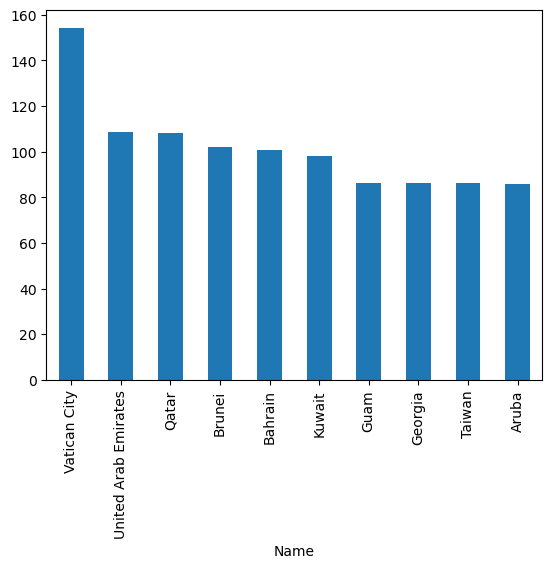

In [15]:
# Ploting top 10
import matplotlib.pyplot as plt
import seaborn as sns
top_users_per1=top_users_per.set_index("Name")
top_users_per1["Facebook_Users%"].plot(kind="bar")

<AxesSubplot:xlabel='Name'>

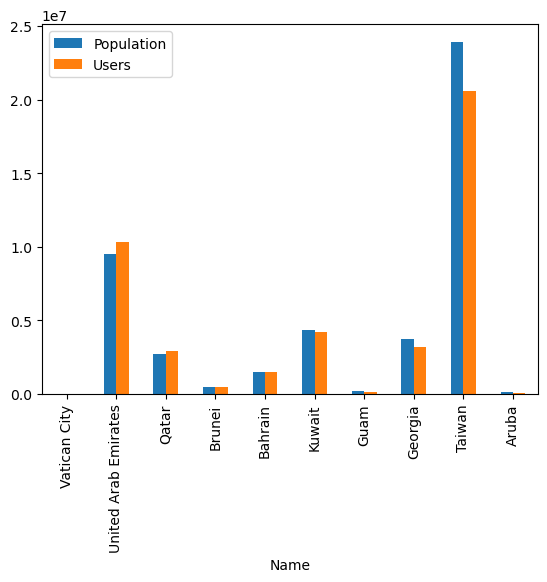

In [16]:
# Population by Users of TOP 10(Facebook_Users%)
top_users_per.plot(y=['Population','Users'], x= 'Name', kind = 'bar')

In [17]:
top_users = df.nlargest(10,'Users')
top_users1=top_users.set_index("Name")

<AxesSubplot:ylabel='Users'>

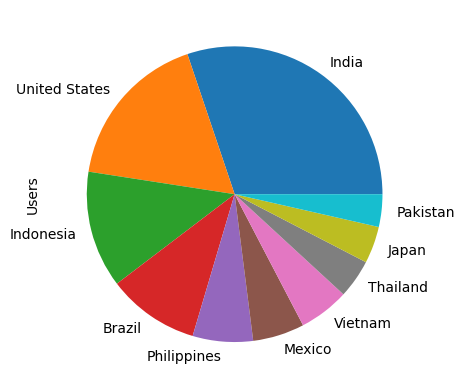

In [18]:
# Users Partition of TOP 10(Users)
top_users1["Users"].plot(kind="pie")


<AxesSubplot:xlabel='Name'>

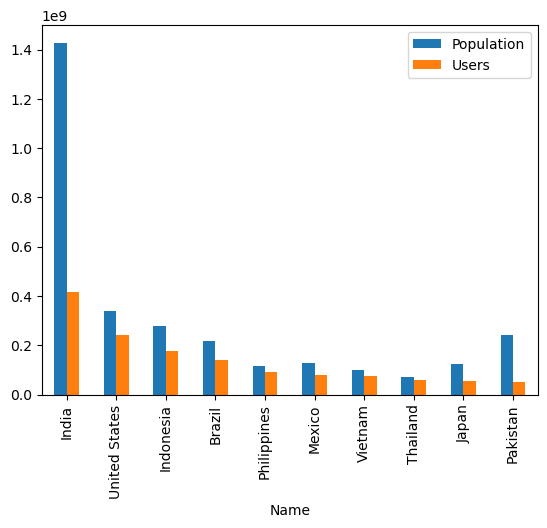

In [19]:
# Population by Users of TOP 10(Users)
top_users.plot(y=['Population','Users'], x= 'Name', kind = 'bar')

# UPVOTE IF YOU FIND IT USEFUL